In [10]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1daa85effb0>)

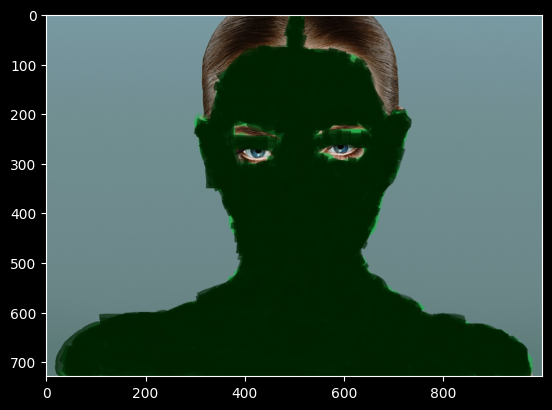

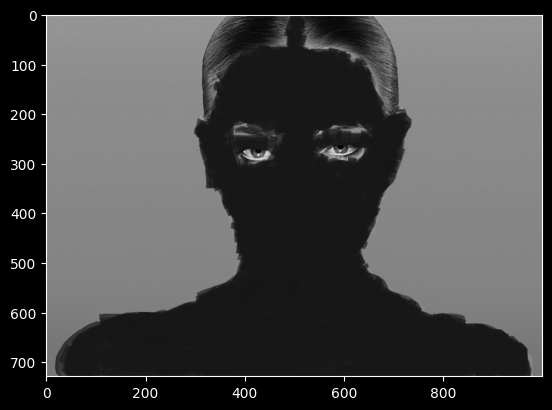

In [11]:

img = io.imread('1_colorat.jpg')
plt.figure(),plt.imshow(img)

gray = color.rgb2gray(img)
plt.figure(),plt.imshow(gray, cmap = 'gray')


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 10)),
 array([8.33333333e-04, 9.93510980e-02, 1.97868863e-01, 2.96386627e-01,
        3.94904392e-01, 4.93422157e-01, 5.91939922e-01, 6.90457686e-01,
        7.88975451e-01, 8.87493216e-01, 9.86010980e-01]),
 <a list of 1000 BarContainer objects>)

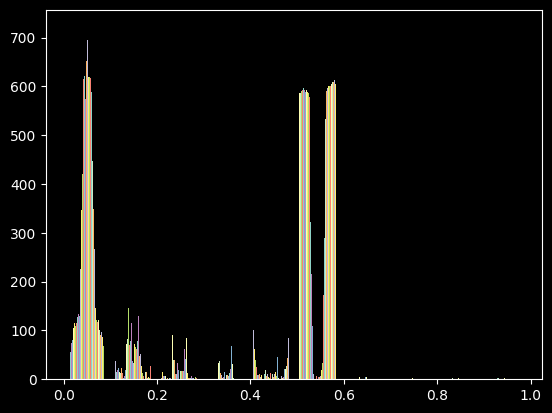

In [12]:
plt.hist(gray,bins=10)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1daaf9d7650>)

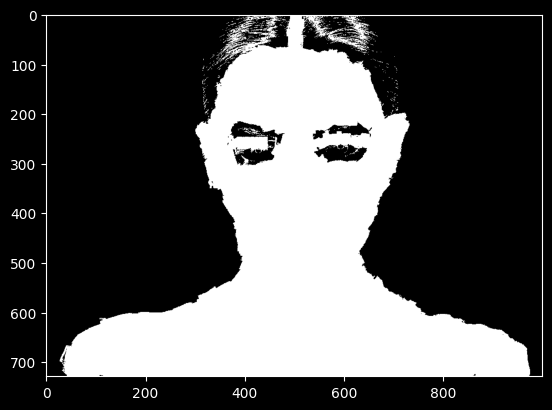

In [13]:
binary = np.zeros(gray.shape)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if(gray[i,j]>= 0.07 and gray[i,j]< 0.15):
            binary[i,j]=1
        else:
            binary[i,j]=0
            
plt.figure(), plt.imshow(binary, cmap='gray')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1daafa6a5a0>)

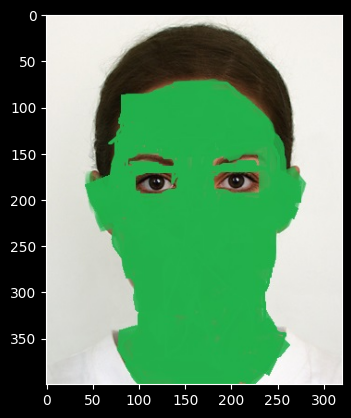

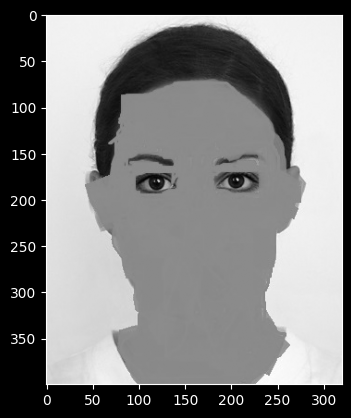

In [14]:
img2 = io.imread('3_colorat.jpg')
plt.figure(),plt.imshow(img2)

gray2 = color.rgb2gray(img2)
plt.figure(),plt.imshow(gray2, cmap = 'gray')



(array([[  0.,   0.,   0., ...,   0., 304.,  96.],
        [  0.,   0.,   0., ...,   0., 207., 193.],
        [  0.,   0.,   0., ...,   0., 230., 170.],
        ...,
        [  0.,   0.,   0., ...,   0.,  57., 343.],
        [  0.,   0.,   0., ...,   0.,  56., 344.],
        [  0.,   0.,   0., ...,   0.,  67., 333.]], shape=(320, 10)),
 array([0.00389882, 0.10322769, 0.20255655, 0.30188541, 0.40121427,
        0.50054314, 0.599872  , 0.69920086, 0.79852973, 0.89785859,
        0.99718745]),
 <a list of 320 BarContainer objects>)

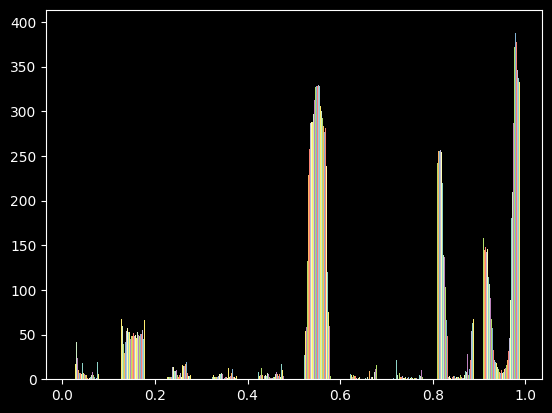

In [15]:
plt.hist(gray2,bins=10)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1dab06de630>)

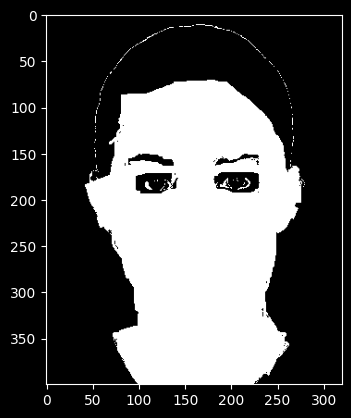

In [16]:
binary2 = np.zeros(gray2.shape)
for i in range(gray2.shape[0]):
    for j in range(gray2.shape[1]):
        if(gray2[i,j]>= 0.45 and gray2[i,j]< 0.6):
            binary2[i,j]=1
        else:
            binary2[i,j]=0
            
plt.figure(), plt.imshow(binary2, cmap='gray')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1dab282b3b0>)

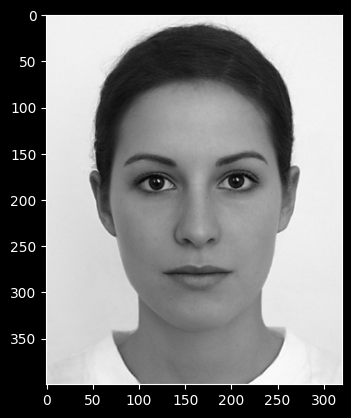

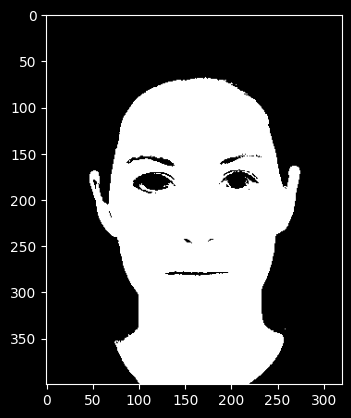

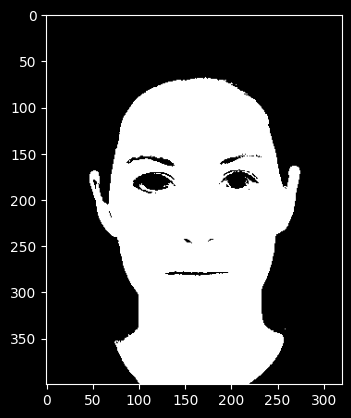

In [17]:
original = io.imread('3.jpg')
original_gray = color.rgb2gray(original)
plt.figure(),plt.imshow(original_gray, cmap = 'gray')

R = original[:,:,0]
G = original[:,:,1]
B = original[:,:,2]

C1 = np.logical_and(R > 95, G > 40, B > 20)
C2 = np.maximum(R, G, B).astype(float) - np.minimum(R, G, B).astype(float) > 15
C3 = np.abs(R-G) > 15
C4 = np.logical_and(R > G, R > B)

C5 = np.logical_and(R > 220, G > 210, B > 170)
C6 = np.abs(R-G) <= 15
C7 = np.logical_and(R > B, G > B)

mask = (C1 * C2 * C3 * C4) + (C5 * C6 * C7)
mask[mask>1]=1

result = mask*original_gray
result[result>0]=1

plt.figure(),plt.imshow(mask, cmap = 'gray')
plt.figure(),plt.imshow(result, cmap = 'gray')


In [18]:
TP = np.logical_and(binary2==1, result==1).sum()/binary2.sum()
print('TP=',TP*100)

TN = np.logical_and(binary2==0, result==0).sum()/(1-binary2).sum()
print('TN=',TN*100)

FN = 1-TP
print('FN=',FN*100)

FP= 1-TN
print('FP=',FP*100)

TP= 93.35579539774515
TN= 98.07658516145601
FN= 6.6442046022548436
FP= 1.9234148385439909
